# Modelo de Regresión

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

### Exploración

In [54]:
df = pd.read_csv('data/Food_Delivery_Times.csv')
df.info()
df_variables = df.drop(['Order_ID', 'Weather','Time_of_Day'], axis=1)
print(df['Traffic_Level'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB
['Low' 'Medium' 'High' nan]


In [55]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [56]:
df_variables.head()

,Distance_km,Traffic_Level,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Low,Scooter,12,1.0,43
1,16.42,Medium,Bike,20,2.0,84
2,9.52,Low,Scooter,28,1.0,59
3,7.44,Medium,Scooter,5,1.0,37
4,19.03,Low,Bike,16,5.0,68


## Modelamiento

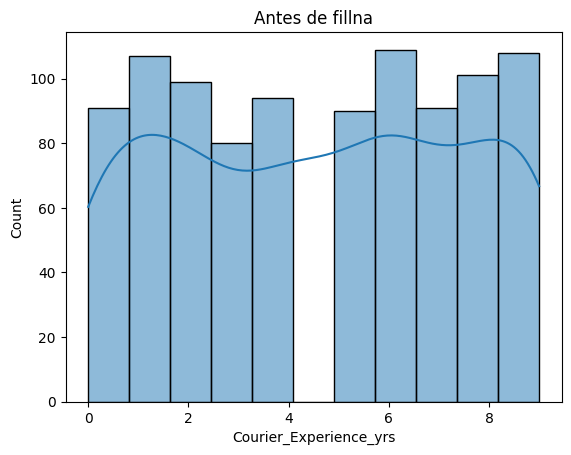

['Scooter' 'Bike' 'Car']
['Low' 'Medium' 'High' nan]


/tmp/ipykernel_1316/3888523813.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_process = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median(), inplace=True)


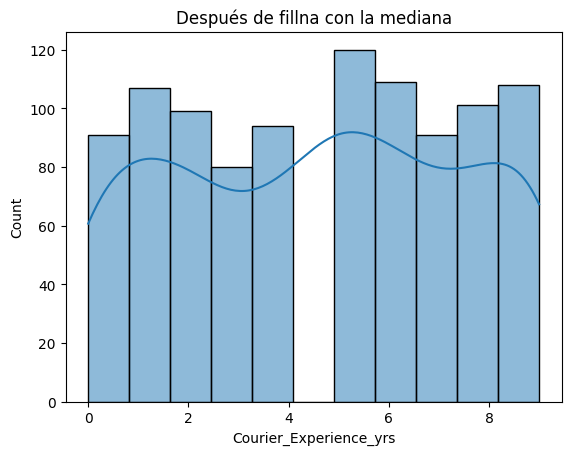

In [57]:
# Histograma antes de rellenar nulos
sns.histplot(df['Courier_Experience_yrs'], kde=True)
plt.title('Antes de fillna')
plt.show()

# Rellenar nulos con la media
df_process = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median(), inplace=True)

print(df['Vehicle_Type'].unique())
print(df['Traffic_Level'].unique())

# Histograma después de rellenar nulos
sns.histplot(df['Courier_Experience_yrs'], kde=True)
plt.title('Después de fillna con la mediana')
plt.show()

# No hay cambios muy significativos en la distribución de los datos, pero ahora no hay nulos.

## OneHotEncoding

In [58]:
df_process = df_variables.copy()
df_process["Traffic_Level"] = df_process["Traffic_Level"].fillna("Missing")
df_process["Vehicle_Type"] = df_process["Vehicle_Type"].fillna("Missing")

df_process['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median(), inplace=True)
onehotencoding= OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = onehotencoding.fit_transform(df_process[["Traffic_Level", "Vehicle_Type"]])
encoded_df = pd.DataFrame(
    encoded,
    columns=onehotencoding.get_feature_names_out(["Traffic_Level", "Vehicle_Type"]),
    index=df_process.index 
    ) 
    # Mantener los mismos índices
    
encoded_df

/tmp/ipykernel_1316/3469800559.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_process['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median(), inplace=True)


,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium,Traffic_Level_Missing,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,1.0,0.0
996,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,1.0,0.0,0.0,0.0,0.0,0.0,1.0
998,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [59]:
df_processed = pd.concat([df_process.drop(["Traffic_Level", "Vehicle_Type"], axis=1), encoded_df], axis=1)
df_processed.info()
df_processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Preparation_Time_min    1000 non-null   int64  
 2   Courier_Experience_yrs  1000 non-null   float64
 3   Delivery_Time_min       1000 non-null   int64  
 4   Traffic_Level_High      1000 non-null   float64
 5   Traffic_Level_Low       1000 non-null   float64
 6   Traffic_Level_Medium    1000 non-null   float64
 7   Traffic_Level_Missing   1000 non-null   float64
 8   Vehicle_Type_Bike       1000 non-null   float64
 9   Vehicle_Type_Car        1000 non-null   float64
 10  Vehicle_Type_Scooter    1000 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 86.1 KB


,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium,Traffic_Level_Missing,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,43,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,16.42,20,2.0,84,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,9.52,28,1.0,59,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,7.44,5,1.0,37,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,19.03,16,5.0,68,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,8.50,13,3.0,54,1.0,0.0,0.0,0.0,0.0,1.0,0.0
996,16.28,8,9.0,71,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,15.62,26,2.0,81,1.0,0.0,0.0,0.0,0.0,0.0,1.0
998,14.17,8,0.0,55,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Modeling Data 

In [60]:
FEATURES = ['Distance_km','Preparation_Time_min', 'Courier_Experience_yrs', 'Traffic_Level_High', 'Traffic_Level_Low', 'Traffic_Level_Medium', 'Traffic_Level_Missing',
            'Vehicle_Type_Bike', 'Vehicle_Type_Car', 'Vehicle_Type_Scooter']
TARGET = ['Delivery_Time_min']
modeling_data = df_processed[FEATURES + TARGET]

X = modeling_data[FEATURES]
X["constant"] = 1 
y = modeling_data['Delivery_Time_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium,Traffic_Level_Missing,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter,constant
29,18.05,10,7.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
535,2.14,18,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
695,3.23,17,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
557,7.51,27,6.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
836,4.62,8,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,17.59,24,6.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
270,9.39,14,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
860,16.38,6,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
435,16.73,9,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [62]:
y_train

29     123
535     34
695     33
557     50
836     33
      ... 
106     69
270     37
860     51
435     71
102     28
Name: Delivery_Time_min, Length: 800, dtype: int64

In [63]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
resultado = model.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:      Delivery_Time_min   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     286.3
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          1.21e-227
Time:                        09:27:13   Log-Likelihood:                -3073.7
No. Observations:                 800   AIC:                             6165.
Df Residuals:                     791   BIC:                             6207.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Distance_km                3

In [64]:
LNRG = LinearRegression()
LNRG.fit(X_train, y_train)
predictions_vector = LNRG.predict(X_test)


predictions = pd.DataFrame({
    "Predicciones":predictions_vector,
    "Real" : y_test
})


train = pd.DataFrame({
    "Predicciones":LNRG.predict(X_train),
    "Real" : y_train
})


predictions

,Predicciones,Real
521,37.071190,32
737,70.348237,68
740,41.640647,39
660,44.586555,44
411,85.058899,85
...,...,...
408,77.575603,78
332,34.701651,28
208,55.217844,60
613,40.690068,45


In [65]:
train

,Predicciones,Real
29,72.298793,123
535,41.762704,34
695,40.107897,33
557,54.836133,50
836,34.334841,33
...,...,...
106,81.476406,69
270,49.527958,37
860,67.709762,51
435,73.564749,71


<Axes: xlabel='Predicciones', ylabel='Real'>

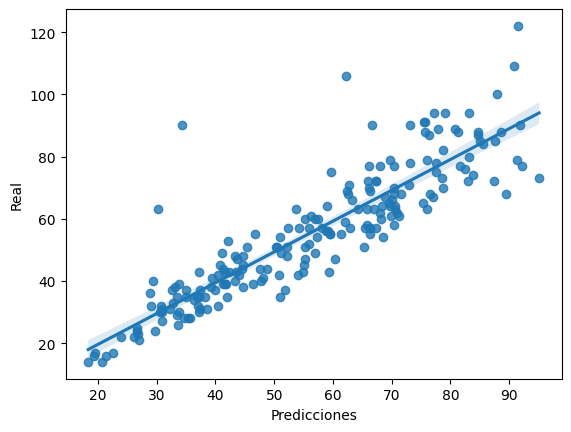

In [66]:
sns.regplot(x="Predicciones", y="Real", data=predictions)

<Axes: xlabel='Predicciones', ylabel='Real'>

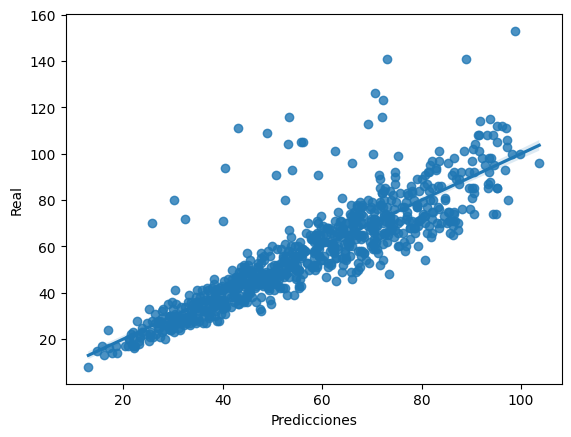

In [67]:
sns.regplot(x="Predicciones", y="Real", data=train)